In [1]:
import Data.dataset as ds
import Plots.plots as pl
import Calculations.monte_carlo as mc
from fitter import Fitter, get_common_distributions, get_distributions


import numpy as np 
import statsmodels.api as sm 
import pylab as py

In [2]:
zone1 = ds.get_out1()
zone2 = ds.get_out2()

mass = ('Mass', 'Mass [kg]')
velocity = ('Velocity', 'Velocity [m/s]')
kinetic_energy = ('Kinetic Energy', 'Kinetic Energy [kJ]')
timedelta = ('Timedelta', 'TimeDiffHours')
n_simulations = 1000000

In [3]:
without_outliers_zone1 = ds.replace_outliers_with_median(zone1)
without_outliers_zone2 = ds.replace_outliers_with_median(zone2)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009305,1083.141638,1089.800161,inf,0.136433,0.144822
expon,0.011535,1060.303179,1064.742194,inf,0.116051,0.295644
exponpow,0.013617,991.751234,998.409757,inf,0.204460,0.005713
rayleigh,0.016292,1067.605966,1072.044981,inf,0.168988,0.036290
norm,0.017017,1082.647998,1087.087014,inf,0.137568,0.138696


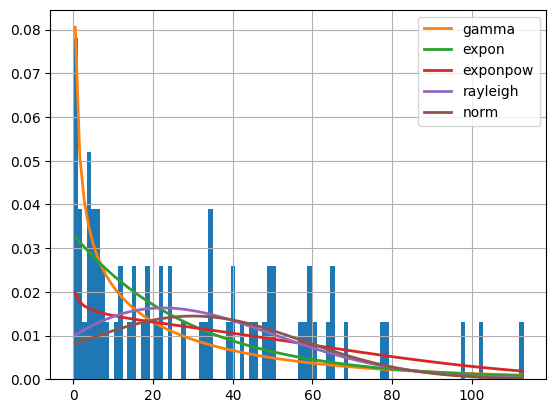

In [4]:
#zone1 timedelta
f = Fitter(without_outliers_zone1['TimeDiffHours'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.021030,1148.200866,1151.132338,inf,0.159221,0.353865
gamma,0.021276,1062.860806,1067.258014,inf,0.105899,0.828831
rayleigh,0.021387,1064.071694,1067.003166,inf,0.159575,0.351265
norm,0.021812,1081.940933,1084.872405,inf,0.184484,0.199670
expon,0.022784,1063.079888,1066.011360,inf,0.224790,0.066752


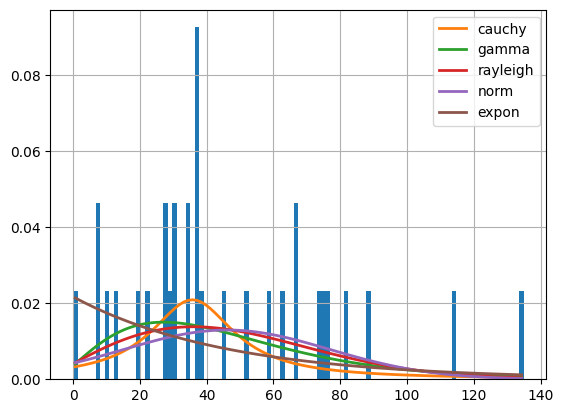

In [5]:
#zone2 timedelta
f = Fitter(without_outliers_zone2['TimeDiffHours'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,564.021316,inf,0.059355,0.958730
lognorm,1.007418,561.582245,568.240768,inf,0.059355,0.958727
gamma,1.010142,560.352868,567.011391,inf,0.063807,0.928074
chi2,1.017533,558.084152,564.742675,inf,0.075881,0.800376
exponpow,1.047920,542.377735,549.036258,inf,0.073655,0.827877


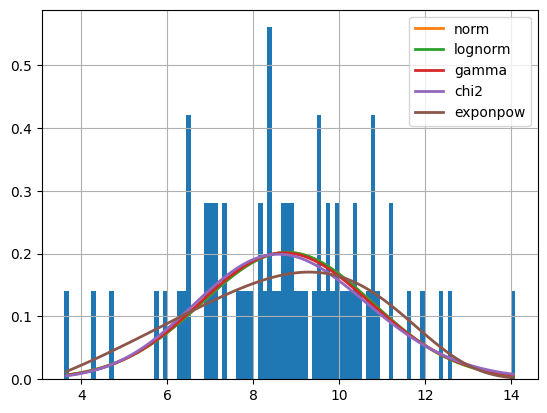

In [6]:
#zone1 velocity
f = Fitter(without_outliers_zone1['Velocity [m/s]'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.607154,675.068739,678.000211,inf,0.104641,0.839121
lognorm,0.607154,677.069040,681.466248,inf,0.104643,0.839108
chi2,0.608647,677.413072,681.810279,inf,0.113398,0.763308
gamma,0.608798,677.225194,681.622402,inf,0.113424,0.763071
uniform,0.622910,618.538663,621.470135,inf,0.221065,0.074555


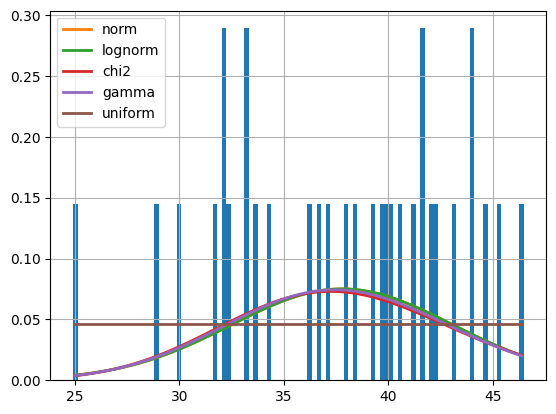

In [7]:
#zone2 velocity
f = Fitter(without_outliers_zone2['Velocity [m/s]'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000100,1574.328496,1580.987020,inf,0.106740,0.393001
cauchy,0.000100,1673.119020,1677.558036,inf,0.142975,0.112314
gamma,0.000102,1562.591105,1569.249628,inf,0.119644,0.263002
chi2,0.000102,1562.591093,1569.249616,inf,0.119644,0.263002
rayleigh,0.000111,1572.933925,1577.372941,inf,0.214867,0.003102


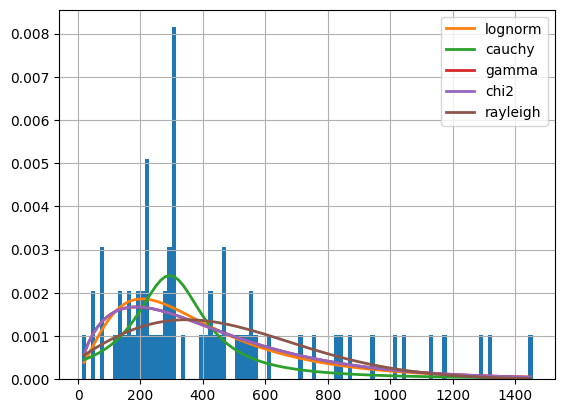

In [8]:
#zone1 mass
f = Fitter(without_outliers_zone1['Mass [kg]'], distributions=get_common_distributions())
f.fit()

f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.008701,1318.796262,1321.727734,inf,0.148463,0.438699
gamma,0.009328,1197.606758,1202.003966,inf,0.153161,0.400301
rayleigh,0.009491,1202.652001,1205.583472,inf,0.255145,0.025258
expon,0.009601,1195.788897,1198.720369,inf,0.183847,0.202795
exponpow,0.009609,1170.468891,1174.866099,inf,0.183749,0.203279


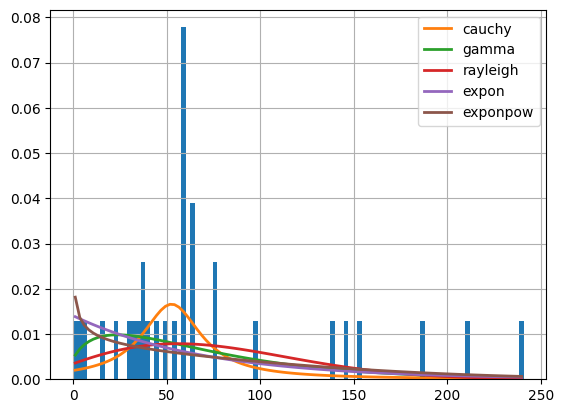

In [9]:
#zone2 mass
f = Fitter(without_outliers_zone2['Mass [kg]'], distributions=get_common_distributions())
f.fit()

f.summary()

Zone1 Timedelta


,TimeDiffHours
0,0.0
1,94.0
2,4.0
3,12.0
4,10.0
...,...
999995,77.0
999996,3.0
999997,4.0
999998,36.0


Zone2 Timedelta


,TimeDiffHours
0,0.0
1,34.0
2,12.0
3,71.0
4,30.0
...,...
999995,41.0
999996,7.0
999997,35.0
999998,44.0


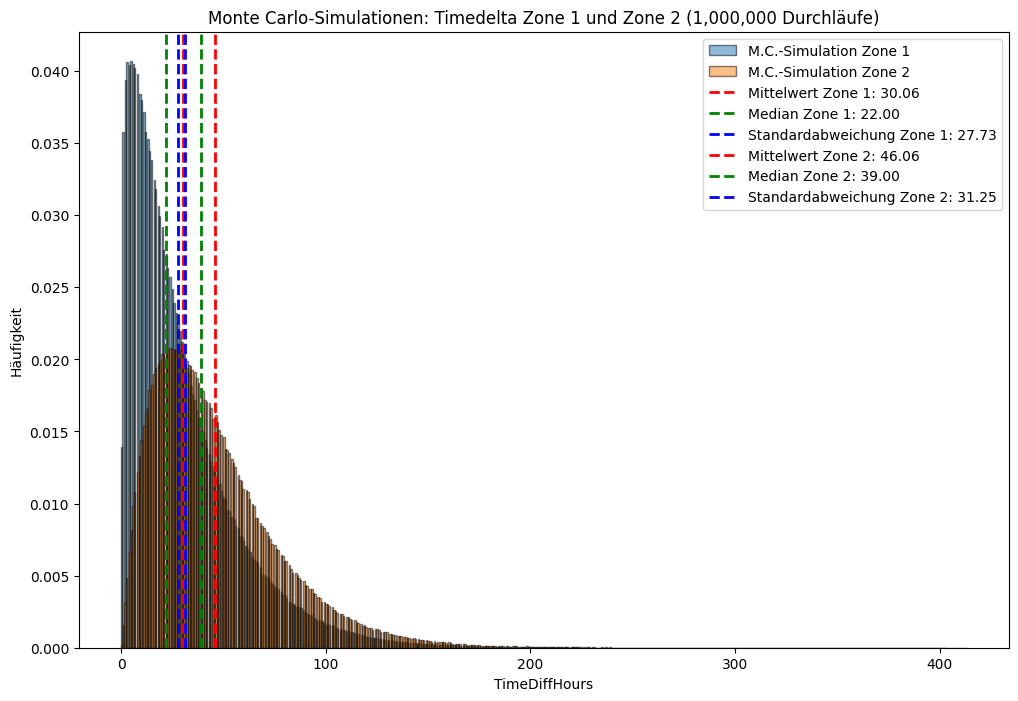

In [10]:
print('Zone1 Timedelta')
sim_timediff_zone1 = mc.simulate_gamma_distribution_rounded(without_outliers_zone1, n_simulations, timedelta)
display(sim_timediff_zone1)

print('Zone2 Timedelta')
sim_timediff_zone2 = mc.simulate_gamma_distribution_rounded(without_outliers_zone2, n_simulations, timedelta)
display(sim_timediff_zone2)

pl.show_simulated_data(sim_timediff_zone1, sim_timediff_zone2, timedelta)

Zone1 Velocity


,Velocity [m/s]
0,10.313914
1,13.697210
2,4.843328
3,13.446527
4,9.546387
...,...
999995,7.882043
999996,5.045406
999997,11.456736
999998,7.387144


Zone2 Velocity


,Velocity [m/s]
0,26.586471
1,36.436903
2,35.371205
3,37.183639
4,35.985731
...,...
999995,32.462686
999996,37.049384
999997,31.843140
999998,40.968181


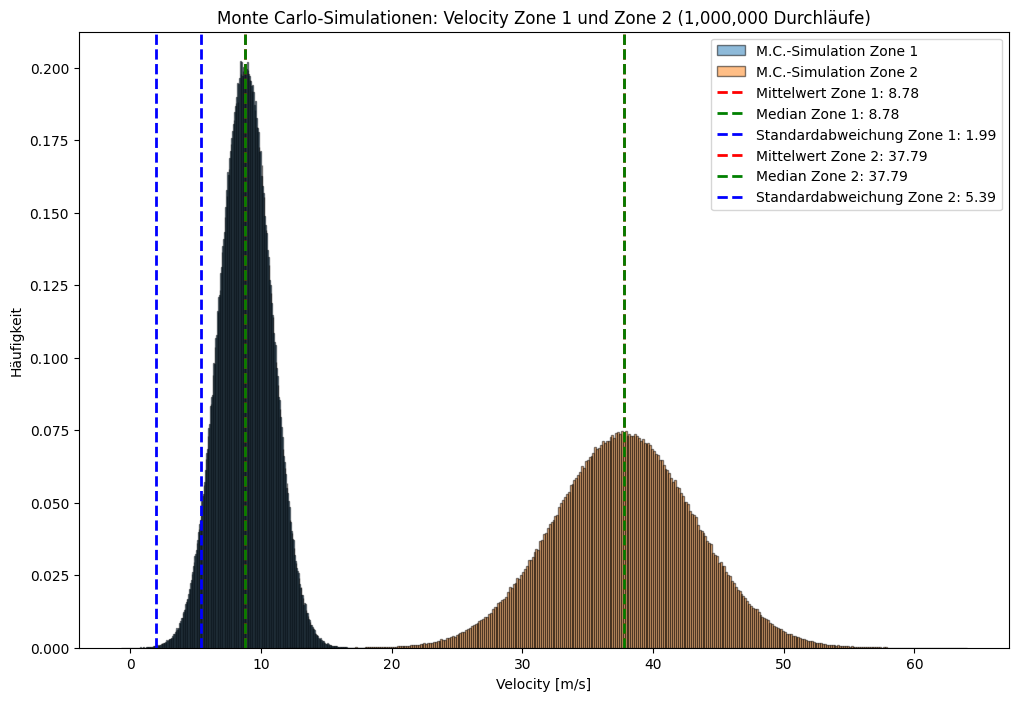

In [11]:
print('Zone1 Velocity')
sim_velocity_zone1 = mc.simulate_norm_distribution(without_outliers_zone1, n_simulations, velocity)
display(sim_velocity_zone1)

print('Zone2 Velocity')
sim_velocity_zone2 = mc.simulate_norm_distribution(without_outliers_zone2, n_simulations, velocity)
display(sim_velocity_zone2)

pl.show_simulated_data(sim_velocity_zone1, sim_velocity_zone2, velocity)

Zone1 Mass


,Mass [kg]
0,134.551036
1,177.744184
2,139.838076
3,611.755537
4,176.591815
...,...
999995,523.187253
999996,460.560959
999997,201.029507
999998,103.795691


Zone2 Mass


,Mass [kg]
0,152.279859
1,19.882410
2,63.967151
3,15.937489
4,121.649570
...,...
999995,114.420896
999996,116.557513
999997,88.516997
999998,142.541301


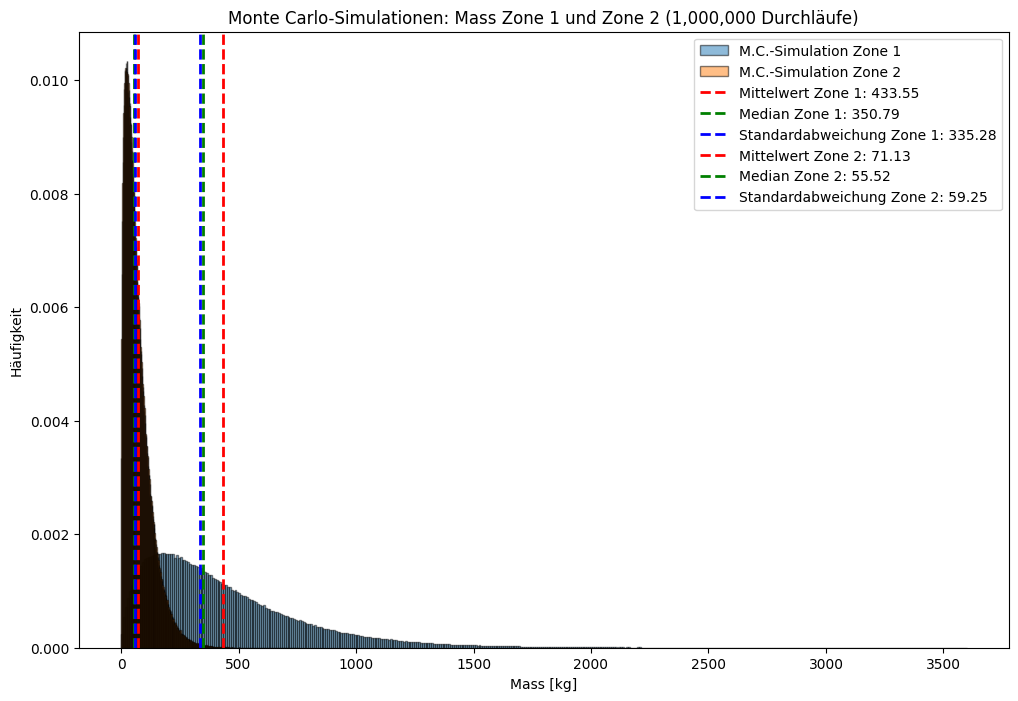

In [12]:
print('Zone1 Mass')
sim_mass_zone1 = mc.simulate_gamma_distribution(without_outliers_zone1, n_simulations, mass)
display(sim_mass_zone1)

print('Zone2 Mass')
sim_mass_zone2 = mc.simulate_gamma_distribution(without_outliers_zone2, n_simulations, mass)
display(sim_mass_zone2)

pl.show_simulated_data(sim_mass_zone1, sim_mass_zone2, mass)

Zone1


,Mass [kg],Velocity [m/s],Kinetic Energy [kJ]
0,134.551036,10.313914,7.156556
1,177.744184,13.697210,16.673610
2,139.838076,4.843328,1.640149
3,611.755537,13.446527,55.305483
4,176.591815,9.546387,8.046716
...,...,...,...
999995,523.187253,7.882043,16.251921
999996,460.560959,5.045406,5.862048
999997,201.029507,11.456736,13.193245
999998,103.795691,7.387144,2.832060


Zone2


,Mass [kg],Velocity [m/s],Kinetic Energy [kJ]
0,152.279859,26.586471,53.818780
1,19.882410,36.436903,13.198420
2,63.967151,35.371205,40.015360
3,15.937489,37.183639,11.017769
4,121.649570,35.985731,78.766446
...,...,...,...
999995,114.420896,32.462686,60.289857
999996,116.557513,37.049384,79.996735
999997,88.516997,31.843140,44.877478
999998,142.541301,40.968181,119.620079


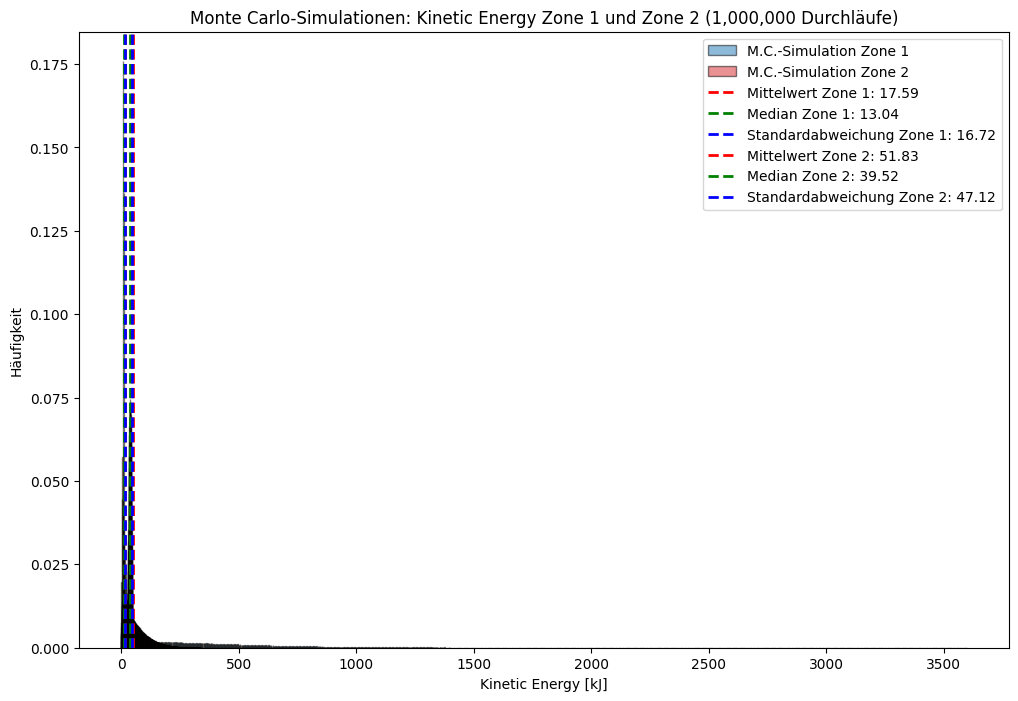

In [13]:
merged_zone1 = ds.merge_simulated_data(sim_mass_zone1, sim_velocity_zone1)
merged_zone2 = ds.merge_simulated_data(sim_mass_zone2, sim_velocity_zone2)

print('Zone1')
display(merged_zone1)
print('Zone2')
display(merged_zone2)

pl.show_simulated_data(merged_zone1, merged_zone2, kinetic_energy)